In [17]:
%matplotlib notebook

import numpy as np
import pylab as p
from mpl_toolkits import mplot3d
from scipy.integrate import odeint 

In [18]:
a = 1.
b = 0.5
c = 0.75
d = 0.25
def model(M,t=0):
    x,y  = M  
    dxdt = a*M[0] -   b*M[0]*M[1]
    dydt =  -c*M[1] + d*b*M[0]*M[1]
    return np.array([dxdt,dydt])
def pendulum(M,t=0):
    beta  =1
    alpha = 0.5
    x,y  = M  
    dxdt = y
    dydt =  -beta * x - alpha*y
    return np.array([dxdt,dydt])

def plotter3D(t,X,model):
    r,c = X.shape
    fig =  p.figure(figsize=(10,8))
    ax =  p.axes(projection="3d")
    for i in range(r):
        Z =  odeint(model,X[i],t)
        x,y,z =  Z.T
        ax.plot3D(x, y, z)
    ax.set_xlabel(r'$x(t)$')
    ax.set_ylabel(r'$y(t)$')
    ax.set_zlabel(r'$z(t)$')
    ax.set_title('Dynamical System Phase Portrait')
    p.show()

In [19]:
M = [1,0]
t  =  np.linspace(0,50,1000)

M_t = odeint(model,M,t)

In [20]:
M = [c/d,a/b]
t  =  np.linspace(0,50,1000)
M_t = odeint(model,M,t)

<IPython.core.display.Javascript object>


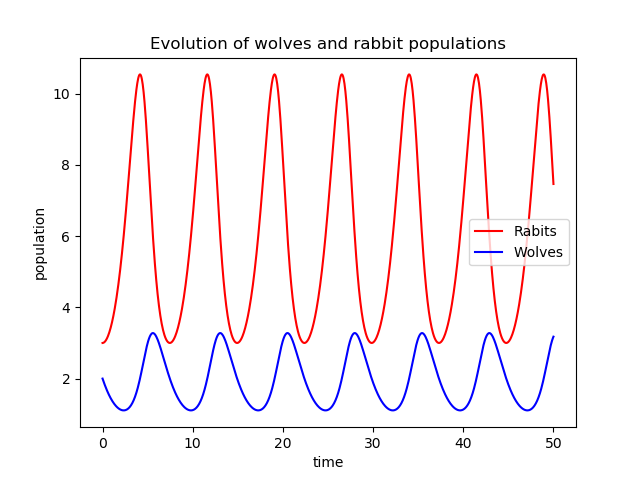

In [21]:
rabits, wolves  =  M_t.T
f1  = p.figure()
p.plot(t,rabits,'r-',label="Rabits")
p.plot(t,wolves,'b-',label="Wolves")
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of wolves and rabbit populations')
p.show()

<IPython.core.display.Javascript object>


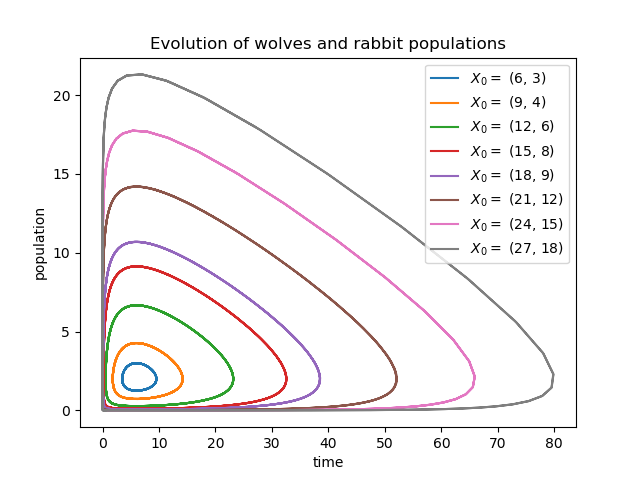

In [22]:
f2  = p.figure()
X = np.array([[6,3 ],[9,4],[12,6],[15,8],[18,9],[21,12],[24,15],[27,18]])
for i in range(len(X)):
    M_t = odeint(model,X[i],t)
    rabits,wolves =  M_t.T
    p.plot(rabits,wolves,label=rf"$X_0=$ ({X[i][0]}, {X[i][1]})")
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of wolves and rabbit populations')
p.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#add %matplotlib inline if using a Jupyter notebook, remove if using a .py script
%matplotlib inline

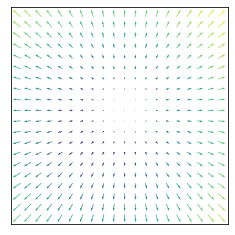

In [8]:
#X, Y  =  M_t.T
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
n = -2
color_array = np.sqrt(((U-n)/2)**2 + ((V-n)/2)**2)
q = ax.quiver(X, Y, U, V,color_array)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')
plt.show()

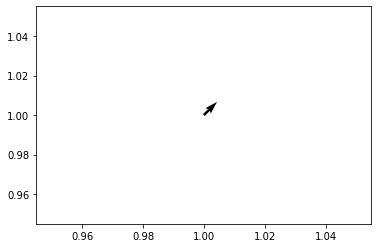

In [9]:
f,ax =  plt.subplots()
x_0 = 0
y_0  = 0
x = 1
y = 1
u,v = np.meshgrid(x,y)
q  =  ax.quiver(x,y,u,v)
ax.quiverkey(q,X=0.3,Y=1.1,U=10,label="bla",labelpos="W")
plt.show()

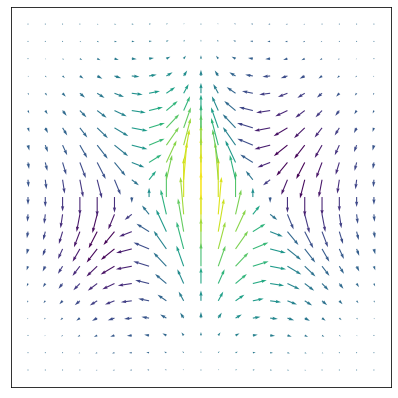

In [10]:
x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)

X, Y = np.meshgrid(x, y)
z = X*np.exp(-X**2 -Y**2)
res = np.gradient(z)
dx, dy = res[0],res[1]
fig, ax = plt.subplots(figsize=(7,7))
n = -2
color_array = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2)
ax.quiver(X,Y,dx,dy,color_array)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

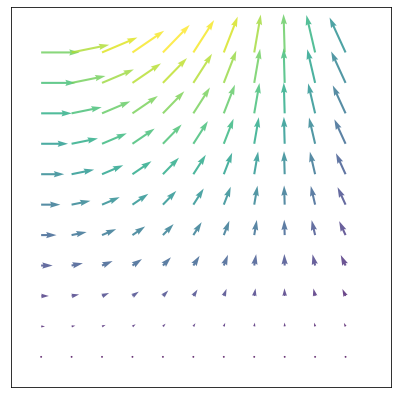

In [11]:
x = np.arange(0,2.2,0.2)
y = np.arange(0,2.2,0.2)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y 
v = np.sin(y)*Y 

n = -4
color_array = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)

fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(X,Y,u,v, color_array, alpha=0.8)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.2, 2.3, -0.2, 2.3])
ax.set_aspect('equal')

plt.show()

In [12]:


def f(x,c):
    x,y = c
    dx =  3*x -  2*y
    dy =  2*x - 2*y
    return np.array([dx,dy])

def RK4OdeSys(f,c,t):
    
    h = t[1] - t[0]
    
    N = len(t)
    
    z = np.zeros((N,len(c)))
    z[0] = c
    
    for n in range(0,N-1):
        k1 = h *f(t[n],z[n])
        k2 =  h * f(t[n] + h, z[n] + k1)
        k3 = f(t[n] + (h/2), z[n] + (h * (k2/2)))
        k4 =  f(t[n]+ t, z[n] + (h * k3))
        z[n+1] =  z[n] + (1/6)* ( k1 + 2*k2 + 2*k3 + k4)
    return z




In [13]:
h = 0.01
t =  np.arange(0,1,h)

z0 = np.array([1,0])
A  = np.array([[3,-2],[2,-2]])


z_rk_4 =  RK4OdeSys(f,z0,t)

In [14]:
def lorenz(w,t):
    x,y,z = w
    sigma =  10
    b =  8/3
    r  = 3
    dxdt =  -sigma*x + sigma * y
    dydt  =  r* x  -  y - x*z
    dzdt =  x*y - b*z
    return np.array([dxdt,dydt,dzdt])

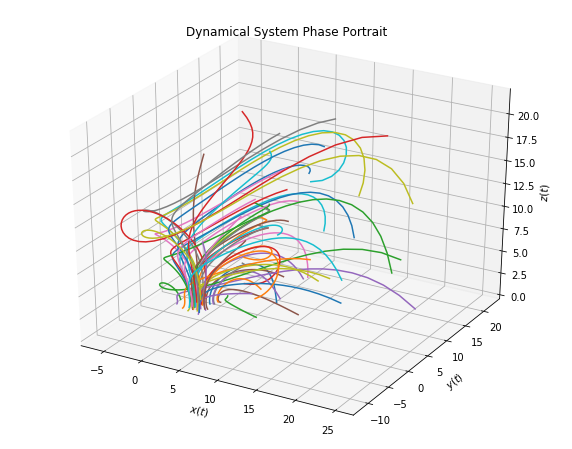

In [16]:
w  = np.round(np.abs(np.random.randn(50,3) * 10))
plotter3D(t,w,lorenz)